<a href="https://colab.research.google.com/github/Logeshwari-2001/Anomaly/blob/main/Anomaly_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import imblearn
import sys

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Settings
pd.set_option('display.max_columns', None)
np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=3)
sns.set(style="darkgrid")
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

print("pandas : {0}".format(pd.__version__))
print("numpy : {0}".format(np.__version__))
print("matplotlib : {0}".format(matplotlib.__version__))
print("seaborn : {0}".format(sns.__version__))
print("sklearn : {0}".format(sklearn.__version__))
print("imblearn : {0}".format(imblearn.__version__))


pandas : 1.5.3
numpy : 1.22.4
matplotlib : 3.7.1
seaborn : 0.12.2
sklearn : 1.2.2
imblearn : 0.10.1


In [3]:
datacols = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]

# Load NSL_KDD train dataset
train = pd.read_csv("/content/KDDTrain.csv", names=datacols) # change path to where the dataset is located.
#test = pd.read_csv("/content/KDDTest.csv", names=datacols)
#eliminating the unwanted extra field
train = train.iloc[:,:-1]
#test = test.iloc[:,:-1]
     

In [4]:
print(train.head(4))

print("Training data has {} rows & {} columns".format(train.shape[0],train.shape[1]))

   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   

   wrong_fragment  urgent  hot  num_failed_logins  logged_in  num_compromised  \
0               0       0    0                  0          0                0   
1               0       0    0                  0          0                0   
2               0       0    0                  0          0                0   
3               0       0    0                  0          1                0   

   root_shell  su_attempted  num_root  num_file_creations  num_shells  \
0           0             0         0                   0           0   
1           0             0         0                   0           0   
2           0 

MAPPING THE PRIME ATTACK WITH SUB PRIME ATTACKS

In [5]:
mapping = {'ipsweep': 'Probe','satan': 'Probe','nmap': 'Probe','portsweep': 'Probe','saint': 'Probe','mscan': 'Probe',
        'teardrop': 'DoS','pod': 'DoS','land': 'DoS','back': 'DoS','neptune': 'DoS','smurf': 'DoS','mailbomb': 'DoS',
        'udpstorm': 'DoS','apache2': 'DoS','processtable': 'DoS',
        'perl': 'U2R','loadmodule': 'U2R','rootkit': 'U2R','buffer_overflow': 'U2R','xterm': 'U2R','ps': 'U2R',
        'sqlattack': 'U2R','httptunnel': 'U2R',
        'ftp_write': 'R2L','phf': 'R2L','guess_passwd': 'R2L','warezmaster': 'R2L','warezclient': 'R2L','imap': 'R2L',
        'spy': 'R2L','multihop': 'R2L','named': 'R2L','snmpguess': 'R2L','worm': 'R2L','snmpgetattack': 'R2L',
        'xsnoop': 'R2L','xlock': 'R2L','sendmail': 'R2L',
        'normal': 'Normal'
        }

In [6]:
train['attack'] = train['attack'].apply(lambda v: mapping[v])

In [7]:
attack_class_freq_train = train[['attack']].apply(lambda x: x.value_counts())

attack_class_freq_train['frequency_percent_train'] = round((100 * attack_class_freq_train / attack_class_freq_train.sum()),2)
attack_class_dist = pd.concat([attack_class_freq_train], axis=1) 
attack_class_dist

,attack,frequency_percent_train
Normal,67343,53.46
DoS,45927,36.46
Probe,11656,9.25
R2L,995,0.79
U2R,52,0.04


FEATURE SCALING

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# extract numerical attributes and scale it to have zero mean and unit variance  
cols = train.select_dtypes(include=['float64','int64']).columns
sc_train = scaler.fit_transform(train.select_dtypes(include=['float64','int64']))


# turn the result back to a dataframe
sc_traindf = pd.DataFrame(sc_train, columns = cols)


In [33]:
print(sc_traindf)

        duration  src_bytes  dst_bytes      land  wrong_fragment    urgent  \
0      -0.110249  -0.007679  -0.004919 -0.014089       -0.089486 -0.007736   
1      -0.110249  -0.007737  -0.004919 -0.014089       -0.089486 -0.007736   
2      -0.110249  -0.007762  -0.004919 -0.014089       -0.089486 -0.007736   
3      -0.110249  -0.007723  -0.002891 -0.014089       -0.089486 -0.007736   
4      -0.110249  -0.007728  -0.004814 -0.014089       -0.089486 -0.007736   
...          ...        ...        ...       ...             ...       ...   
125968 -0.110249  -0.007762  -0.004919 -0.014089       -0.089486 -0.007736   
125969 -0.107178  -0.007744  -0.004883 -0.014089       -0.089486 -0.007736   
125970 -0.110249  -0.007382  -0.004823 -0.014089       -0.089486 -0.007736   
125971 -0.110249  -0.007762  -0.004919 -0.014089       -0.089486 -0.007736   
125972 -0.110249  -0.007737  -0.004919 -0.014089       -0.089486 -0.007736   

             hot  num_failed_logins  logged_in  num_compromised

ENCODING THE DATA

In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# extract categorical attributes from both training and test sets 
cattrain = train.select_dtypes(include=['object']).copy()


# encode the categorical attributes
traincat = cattrain.apply(encoder.fit_transform)


# separate target column from encoded data 
enctrain = traincat.drop(['attack'], axis=1)
cat_Ytrain = traincat[['attack']].copy()



In [32]:
print(traincat)

        protocol_type  service  flag  attack
0                   1       20     9       1
1                   2       44     9       1
2                   1       49     5       0
3                   1       24     9       1
4                   1       24     9       1
...               ...      ...   ...     ...
125968              1       49     5       0
125969              2       49     9       1
125970              1       54     9       1
125971              1       30     5       0
125972              1       20     9       1

[125973 rows x 4 columns]


In [10]:
train_x = pd.concat([sc_traindf,enctrain],axis=1)
train_y = train['attack']
train_x.shape




(125973, 41)

TARGET VARIABLE

In [11]:
train_y
y=train.attack




In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_x, y, test_size=0.2, random_state=42)


ACCURACY OF EACH FEATURE FOR FEATURE EXTRACTION

In [13]:
accuracy_dict = {}

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
for feature in X_train.columns:
    # Fit a rfc model using cross-validation to choose the optimal hyperparameters
    rfc = RandomForestClassifier(n_estimators=100, random_state=42)
    scores = cross_val_score(rfc, X_train[[feature]], y_train, cv=5)
    accuracy = scores.mean()
    # Evaluate the performance of the model on the validation set
    rfc.fit(X_train[[feature]], y_train)
    y_pred = rfc.predict(X_test[[feature]])
    accuracy_dict[feature] = accuracy_score(y_test, y_pred)

# Print the accuracy scores for each feature
for feature, accuracy in accuracy_dict.items():
    print(feature, ':', accuracy)

duration : 0.5355824568366739
src_bytes : 0.9262552093669378
dst_bytes : 0.8128993847985712
land : 0.5327644373883708
wrong_fragment : 0.5417741615399881
urgent : 0.5327247469736058
hot : 0.5405040682675134
num_failed_logins : 0.5326056757293114
logged_in : 0.7372891446715618
num_compromised : 0.5387973804326255
root_shell : 0.5327247469736058
su_attempted : 0.5327247469736058
num_root : 0.532685056558841
num_file_creations : 0.532685056558841
num_shells : 0.5326453661440762
num_access_files : 0.5327247469736058
num_outbound_cmds : 0.5327247469736058
is_host_login : 0.5327247469736058
is_guest_login : 0.5327247469736058
count : 0.8045247072831911
srv_count : 0.6258781504266719
serror_rate : 0.8126215518952173
srv_serror_rate : 0.8010319507838857
rerror_rate : 0.5862274260766025
srv_rerror_rate : 0.5668188132565986
same_srv_rate : 0.8494145663822187
diff_srv_rate : 0.8641397102599723
srv_diff_host_rate : 0.5535225243103791
dst_host_count : 0.6729906727525302
dst_host_srv_count : 0.79916

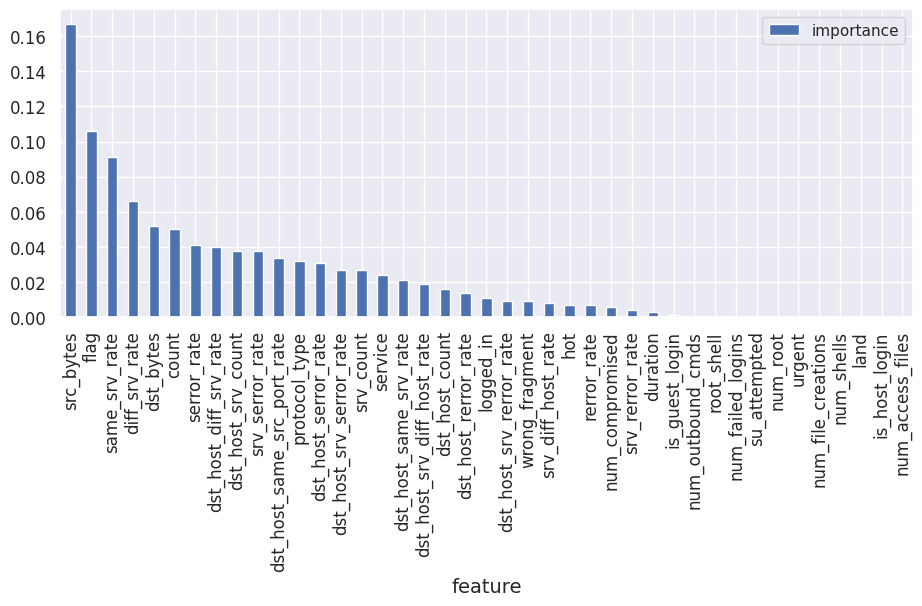

In [15]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier();

# fit random forest classifier on the training set
rfc.fit(train_x, train_y);
# extract important features
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':train_x.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
# plot importances
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar();

SELECTING THE IMPORTANT FEATURES

In [16]:
from sklearn.feature_selection import RFE
import itertools
rfc = RandomForestClassifier()

# create the RFE model and select 10 attributes
rfe = RFE(rfc, n_features_to_select=15)
rfe = rfe.fit(train_x, train_y)

# summarize the selection of the attributes
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), train_x.columns)]
selected_features = [v for i, v in feature_map if i==True]

selected_features

['src_bytes',
 'dst_bytes',
 'count',
 'srv_count',
 'serror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_serror_rate',
 'protocol_type',
 'service',
 'flag']

In [17]:
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

TRAINING THE MODEL

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 

# instantiate the model (using the default parameters)

svm_model = SVC(kernel='rbf', C=10, gamma=0.1,random_state=0)
svm_model.fit(X_train_rfe, y_train)
logreg = LogisticRegression(n_jobs=-1,random_state=0)
logreg.fit(X_train_rfe, y_train)


LogisticRegression(n_jobs=-1, random_state=0)

TOTAL NUMBER OF ITERATIONS

In [19]:
#TOTAL NUMBER OF ITERATIONS FOR SVM
svm_iterations = svm_model.n_iter_
print(svm_iterations)

[ 4859  2732   757   717 10975  2538   721   927   772   178]


In [20]:
#TOTAL NUMBER OF ITERATIONS FOR LOGISTIC REGRESSION
log_iterations = logreg.n_iter_
print(log_iterations)

[100]


THRESHOLD VALUES FOR EACH FEATURE

In [21]:
thresholds = {}
normal_indices = y == 'Normal'
for feature in train_x.columns:
    feature_values = train_x.loc[:, feature]
    feature_normal_values = feature_values[normal_indices]
    threshold = feature_normal_values.max()
    thresholds[feature] = threshold

# Print the threshold value for each feature
for feature, threshold in thresholds.items():
    print(f'{feature}: {threshold:.2f}')

duration: 15.44
src_bytes: 15.25
dst_bytes: 1.74
land: 70.98
wrong_fragment: -0.09
urgent: 208.82
hot: 35.72
num_failed_logins: 88.39
logged_in: 1.24
num_compromised: 312.37
root_shell: 27.28
su_attempted: 44.27
num_root: 306.06
num_file_creations: 88.83
num_shells: 90.15
num_access_files: 90.53
num_outbound_cmds: 0.00
is_host_login: 354.93
is_guest_login: 10.25
count: 3.73
srv_count: 6.65
serror_rate: 1.60
srv_serror_rate: 1.61
rerror_rate: 2.75
srv_rerror_rate: 2.72
same_srv_rate: 0.77
diff_srv_rate: 5.20
srv_diff_host_rate: 3.47
dst_host_count: 0.73
dst_host_srv_count: 1.26
dst_host_same_srv_rate: 1.07
dst_host_diff_srv_rate: 4.85
dst_host_same_src_port_rate: 2.76
dst_host_srv_diff_host_rate: 8.59
dst_host_serror_rate: 1.61
dst_host_srv_serror_rate: 1.62
dst_host_rerror_rate: 2.87
dst_host_srv_rerror_rate: 2.75
protocol_type: 2.00
service: 65.00
flag: 10.00


DOWNLOADING THE RFE AND SCALER OBJECTS



In [29]:
with open('scaler1.pkl', 'wb') as f:
    pickle.dump(scaler, f)

with open('rfe.pkl', 'wb') as f:
    pickle.dump(rfe, f)
     

DOWNLOADING THE SVM MODEL AS PICKLE FILE

In [22]:
import pickle
with open('svm_model1.pkl', 'wb') as f:
    pickle.dump(svm_model, f)

CONFUSION MATRIX FOR SVM(TESTING DATA)

In [24]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
y_test_pred = svm_model.predict(X_test_rfe)
accuracy_svm2 = accuracy_score(y_test, y_test_pred)
print("Accuracy of SVM",accuracy_svm2)
cm_train2 = metrics.confusion_matrix(y_test, y_test_pred)
print(cm_train2)

Accuracy of SVM 0.9859099027584838
[[ 9063   112     6     0     0]
 [   50 13277    66    29     0]
 [   18    18  2321     0     0]
 [    0    45     0   178     1]
 [    0     6     0     4     1]]


In [25]:
confusion_matrix_5x5 = [[ 8987 ,  188 ,    6   ,  0  ,   0],
 [   15 ,13295 ,   66  ,  46 ,    0],
 [    8  ,  31 , 2318    , 0    , 0],
 [    0 ,   69,     0,   154 ,    1],
 [    0 ,    5,     0,     5,     1]]


confusion_matrix_2x2 = [[confusion_matrix_5x5[0][0], sum(confusion_matrix_5x5[0][1:])], 
                       [sum([row[0] for row in confusion_matrix_5x5[1:]]), 
                        sum([item for sublist in confusion_matrix_5x5 for item in sublist]) - confusion_matrix_5x5[0][0] - sum(confusion_matrix_5x5[0][1:])]]

#print(confusion_matrix_2x2)
lst = [[8987, 194], [23, 16014]]
mtx = np.array(lst)

print(mtx)

[[ 8987   194]
 [   23 16014]]


CONFUSION MATRIX FOR LOGISTIC REGRESSION(TESTING DATA)

In [27]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
y_test_pred = logreg.predict(X_test_rfe)
accuracy_logreg = accuracy_score(y_test, y_test_pred)
print("Accuracy of Logistic Regression: ",accuracy_logreg)
cm_train2 = metrics.confusion_matrix(y_test, y_test_pred)
print(cm_train2)

Accuracy of Logistic Regression:  0.9299067275253027
[[ 8654   489    38     0     0]
 [  144 12846   428     4     0]
 [   25   403  1929     0     0]
 [    2   146    76     0     0]
 [    0     5     6     0     0]]


In [28]:
confusion_matrix_5x5 = [[ 8658 ,  433,    90,     0 ,    0],
 [  129, 12846 ,  447 ,    0  ,   0],
 [   34 ,  369  ,1954  ,   0   ,  0],
 [    2  , 220   ,  2   ,  0    , 0],
 [    0   ,  9    , 2    , 0     ,0]]
confusion_matrix_2x2 = [[confusion_matrix_5x5[0][0], sum(confusion_matrix_5x5[0][1:])], 
                       [sum([row[0] for row in confusion_matrix_5x5[1:]]), 
                        sum([item for sublist in confusion_matrix_5x5 for item in sublist]) - confusion_matrix_5x5[0][0] - sum(confusion_matrix_5x5[0][1:])]]
#print(confusion_matrix_2x2)

lst = [[8658, 523], [165, 16014]]
mtx = np.array(lst)

print(mtx)

[[ 8658   523]
 [  165 16014]]


In [30]:
print("Accuracy of SVM",accuracy_svm2)
print("Accuracy of Logistic Regression: ",accuracy_logreg)

Accuracy of SVM 0.9859099027584838
Accuracy of Logistic Regression:  0.9299067275253027
